Code to recreate the NNapex Peacock code from Matlab

In [2]:
from pathlib import Path
from sisap2023.utils.mirflickr import load_encodings

data_root = Path("/Volumes/Data")

# load the dino2 image embeddings and the resnet19 softmax activations
data = load_encodings(data_root / "mf_dino2")
sm_data = load_encodings(data_root / "mf_resnet19_softmax")

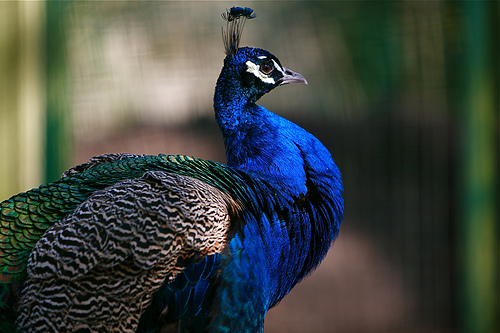

In [5]:
# get the peacock at index 
from sisap2023.utils.mirflickr import get_mf_image
q0 = 101102 # a peacock
get_mf_image(q0)

In [6]:
from matplotlib import pyplot as plt


def imShow( image ):
    # plt.title(Image title")
    #plt.xlabel("X pixel scaling")
    # plt.ylabel("Y pixels scaling")

    fig = plt.figure(figsize = (1,1)) # in inches!
    plt.axis('off')
    plt.imshow(image) # figsize=(640/80,640/80), dpi=80)
    plt.show()

In [7]:
from sisap2023.utils.distances import get_euc_dists
dists = get_euc_dists(q0,allData)
closest_indices = np.argsort(dists) # the closest images to the query

best_100_for_one = closest_indices[0:100]

In [8]:
from sisap2023.utils.count_cats import get_best_cats_in_subset

peacock_category = 84

best_100_categorical = get_best_cats_in_subset(peacock_category,best_100_for_one,smData)

# These are the indices that might be chosen by a human ..

poly_query_indexes = best_100_categorical[0:6] # These are the indices we will use for the poly query


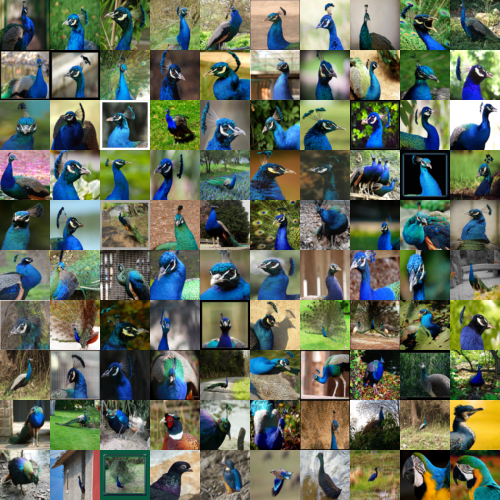

In [9]:
# These are the best images best on lowest average distance from the queries

from sisap2023.utils.mirflickr import make_mf_image_grid

make_mf_image_grid(best_100_categorical,10,10,50,50)

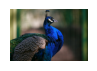

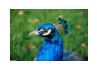

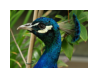

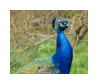

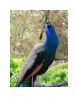

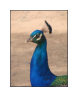

In [10]:


for i in range(0,6): # 0 is the original image
    imShow(get_mf_image(poly_query_indexes[i]))

In [11]:
# Fetch the data and whole-set distances for the extra query objects
# fc6_poly_queries is the FC6 data for the queries we have chosen - not needed
# poly_query_distances is the distances from the queries to the all data 1000000,6

num_queries = len(poly_query_indexes)
# fc6_poly_queries = allData[poly_query_indexes]

poly_query_distances = np.zeros((num_queries,1000*1000))
for i in range(num_queries):
    poly_query_distances[i] = get_euc_dists(poly_query_indexes[i],allData) 




In [12]:
row_sums = np.sum(poly_query_distances,axis=0)
lowest_sum_indices = np.argsort(row_sums)


# for i in range(10):
#     ii = lowest_sum_indices[i]
#     print( ii, row_sums[ii] )

best_100_average_indices = lowest_sum_indices[:100]


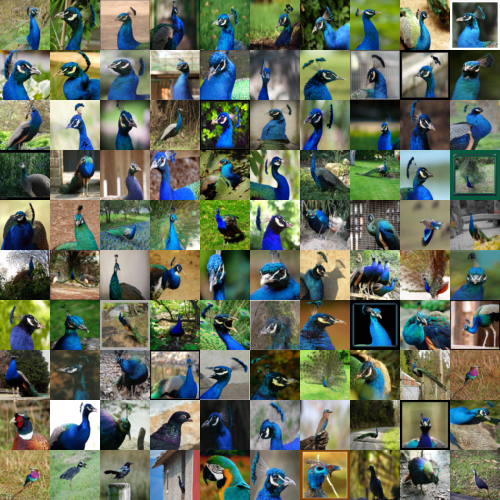

In [13]:
# These are the best images best on lowest average distance from the queries

make_mf_image_grid(best_100_average_indices,10,10,50,50)


In [14]:
# What is the catgegory for Peacock?

peacock_category = 84


In [15]:
# First load the sotmax encodings of the data

softmax_encodings = load_mf_softmax()
softmax_encodings.shape



(1000000, 1000)

In [16]:
from sisap2023.utils.count_cats import count_number_in_cat_gt_thresh 

# Quick santity check
count_number_in_cat_gt_thresh(peacock_category,0.0000000000005,softmax_encodings)

# max_number_possible_peacocks = ??
count_number_in_cat_gt_thresh( peacock_category,0.9,softmax_encodings)

247

In [17]:
# Now want to report results the total count in the category

from sisap2023.utils.count_cats import count_number_in_results_in_cat

encodings_for_best_100_single = softmax_encodings[best_100_for_one] # the alexnet encodings for the best 100 average singlequery images
single_peacock_totals = encodings_for_best_100_single[:,peacock_category]
print("Total peacock sum for single query best 100: ", np.sum(single_peacock_totals))

encodings_for_best_100_average = softmax_encodings[best_100_average_indices] # the alexnet encodings for the best 100 average polyquery images
average_peacock_totals = encodings_for_best_100_average[:,peacock_category]
print("Total peacock sum for poly query best 100: ", np.sum(average_peacock_totals))

res = count_number_in_results_in_cat(peacock_category,0.9,best_100_for_one,softmax_encodings)
print("Total with thresh better than 0.9 single query : ", res)

res = count_number_in_results_in_cat(peacock_category,0.9,best_100_average_indices,softmax_encodings)
print("Total with thresh better than 0.9 poly query : ", res)


Total peacock sum for single query best 100:  84.09667855453304
Total peacock sum for poly query best 100:  83.53485086026264
Total with thresh better than 0.9 single query :  77
Total with thresh better than 0.9 poly query :  77
